In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

from matplotlib.ticker import MultipleLocator

In [2]:
# This is the 2024 'Sustainable Development Index' data time series 1990 to 2022 for 163 countries
# Source: https://www.sustainabledevelopmentindex.org/time-series
# Author and original work: Hickel, Jason. 2020. “The Sustainable Development Index: Measuring the Ecological Efficiency of Human Development in the Anthropocene,”
# It includes spread sheets covering: SDI, Life Expectancy (years), Expected Years of Schooling, ->
# Mean Years of Schooling, GNI pcap. const 2017$ PPP, CO2 emissions per cap (tonnes), Mat. Footprint pcap (tonnes)
dataSDI = pd.ExcelFile('SDI+and+Components+(1990-2022).xlsx')

# Creating seperat dataframe for each socio-ecological indicator

dfSDI = pd.read_excel(dataSDI, 'SDI')
dfSDIT = dfSDI.T

dfLE = pd.read_excel(dataSDI, 'Life Expectancy (years)')
dfLET = dfLE.T

dfES = pd.read_excel(dataSDI, 'Expected Years of Schooling')
dfEST = dfES.T

dfMS = pd.read_excel(dataSDI, 'Mean Years of Schooling')
dfMST = dfMS.T

dfGNI = pd.read_excel(dataSDI, 'GNI pcap. const 2017$ PPP')
dfGNIT = dfGNI.T

# The data for consumption-based CO2 emissions is derived from EORA-PRIMAP. 
dfCO2 = pd.read_excel(dataSDI, 'CO2 emissions pcap (tonnes)')
dfCO2T = dfCO2.T

#The data for material footprint is derived from the UN International Resource Panel Global Material Flows database.
dfMF = pd.read_excel(dataSDI, 'Mat. Footprint pcap (tonnes)')
dfMFT = dfMF.T

In [138]:
# This is the 2024 'Domenstic Material Consumption' data time series 1970 to 2024 for 163 countries (Global Material Flows Database)
# Source: https://www.resourcepanel.org/global-material-flows-database
# Institutions involved developing: Csiro, WU Vieanna, BOKU Vianna, Nagoya University
# Whole Database constitutes of typical MEFA indicators (up to 13 Material-Flows in tonnes per year), MF Indicator (MRIO) and Economic Indicators GDP (const.). 
# Critical Intensities (DMC/GDP ect. ) can be found there.
# For this analysis we download DMC/cap
dfDMC = pd.read_csv("mfa_dmc_pc_CRI.csv")
dfDMCT = dfDMC.T

In [4]:
#Here we set the Functions to calculate the Development Index and Eceological Impact Index (Hickl, 2020)

def LEI(x):
    '''Function for the Life Expectancy Index. Takes as variable: Life Expectancy (years)'''
    return (x - 20)/(85-20)

def EI(x,y):
     '''Function for the Education Index. Variable: Mean Years of Schooling and Expected Years of Schooling'''
     return (x + y)/2

def II(x):
    '''Function for the Income Index. Variable: GNI pcap. const 2017$ PPP'''
    return (np.log(x) - np.log(100))/(np.log(20000)-np.log(100))

def DI(a,x,y,z):
    '''Function for the Development Index. Takes: Life Expectancy (years); Mean Years of Schooling; Expected Years of Schooling; Variable: GNI pcap. const 2017$ PPP'''
    return (LEI(a)*EI(x,y)*II(z))**(1/3)


def EII(s,a,x,y,z):
    '''Ecological Impact Index. Is calculated indirectly (because CO2 Planetary Boundaries data is missing). Takes: SDI and DI(a,x,y,z) '''
    return DI(a,x,y,z)/s

In [115]:
# The DI is iterated in a for loop, handing out an numpy array 'DevIndCRI'. 
# For some reasones the II funtion leads to NaN values when uses to calculate DI when using the whole collumns as inputs
# When going for a crosscountry analysis, this needs to be fixed.
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [DI(dfLET.iat[x,37],dfMST.iat[x,37],dfEST.iat[x,37],dfGNIT.iat[x,37])]
     else:
        print('Somthing went wrong with the loop range')
DevIndCRI = np.array(lst)

In [114]:
# The EII is iterated in a for loop, handing out an numpy array 'EcoImpIndCRI'. 
# For some reasones the II funtion leads to NaN values when uses to calculate DI when using the whole collumns as inputs
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [EII(dfSDIT.iat[x,37],dfLET.iat[x,37],dfMST.iat[x,37],dfEST.iat[x,37],dfGNIT.iat[x,37])]
     else:
        print('wrong len')
EcoImpIndCRI = np.array(lst)

In [147]:
# Calculating the Externalization Intensity DMC/MF
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [dfDMCT.iloc[22+x]/dfMFT.iat[x,37]]
     else:
        print('wrong len')
DMCoverMF = np.array(lst)

In [166]:
# Creating a numpy arry for DMC/cap 'DMC'
lst = []
for x in range(2,35):
     if x >= 2:
          lst += [dfDMCT.iloc[22+x]]
     else:
        print('wrong len')
DMC = np.array(lst)


C:\Users\admin\AppData\Local\Temp\ipykernel_14248\2893599094.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(dfSDIT[37][1])


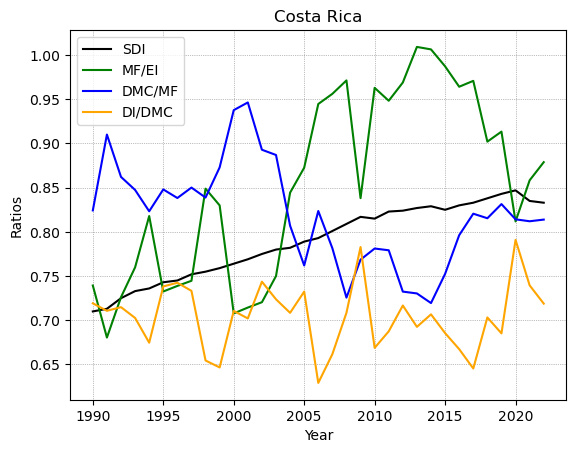

In [189]:
#Plotting the SDI for Costa Rica from 1990 to 2022

# Sample data

plt.plot(dfSDIT[37][2:], label='SDI', color='black')
plt.plot(dfMFT[37][2:]/EcoImpIndCRI/4.5, label='MF/EI', color='green')
plt.plot(DMCoverMF/1.2, label='DMC/MF', color='blue')
plt.plot((DevIndCRI/dfDMCT.iloc[24:57].T).T/0.3, label='DI/DMC', color='orange')

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(base=5))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Ratios')
plt.title(dfSDIT[37][1])
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.5, color='gray', markersize=2)

# Display the plot
plt.show()